In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/91992/OneDrive/Documents/sem-5/MLL/Admission_Predict.csv")

In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
data.shape

(400, 9)

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
####### (The last column of the dataset needs to be changed to 0 or 1)  

In [10]:

# binarisor need to do for changing output variable
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
data['Chance of Admit '] = bi.fit_transform(data[['Chance of Admit ']])

In [11]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [13]:
x = data.drop('Chance of Admit ', axis = 1) #axis=1 for column
y = data['Chance of Admit ']

In [14]:
x 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [17]:
y = y.astype('int') #categorical data

In [18]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

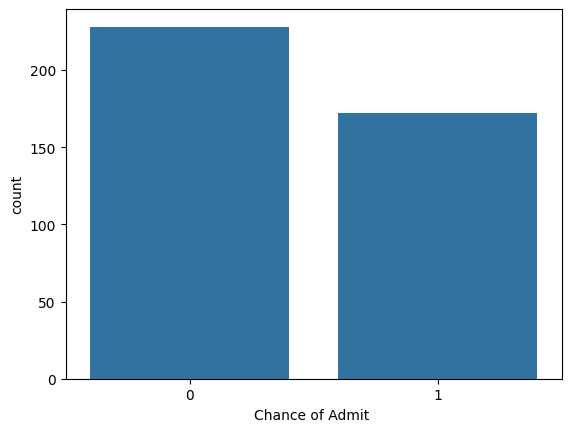

In [20]:
sns.countplot(x = y); #key=value

In [21]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [22]:
#data prepration(train-test-split)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [23]:
x_train.shape

(300, 8)

In [24]:
x_test.shape

(100, 8)

In [26]:
#make model , import class
from sklearn.tree import DecisionTreeClassifier

In [27]:
Classifier = DecisionTreeClassifier(random_state=0) 

In [30]:
Classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_pred = Classifier.predict(x_test)

In [32]:
result = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred
})

In [33]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

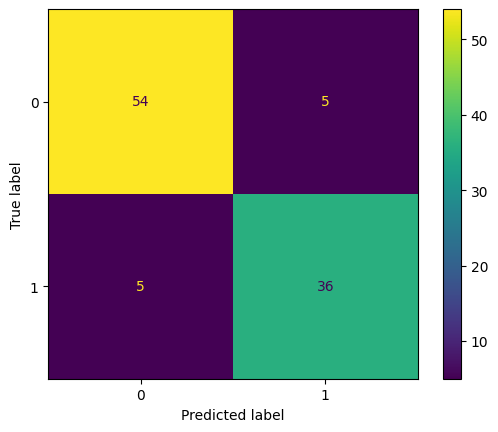

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
accuracy_score(y_test, y_pred)

0.9

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [47]:
###### EVALUATE
new = [[5,314,103,2,2.0,3.0,8.21,0]]
Classifier.predict(new)[0]

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


np.int64(0)

In [48]:
#### DESITION TREE
from sklearn.tree import plot_tree

In [50]:
import matplotlib.pyplot as plt

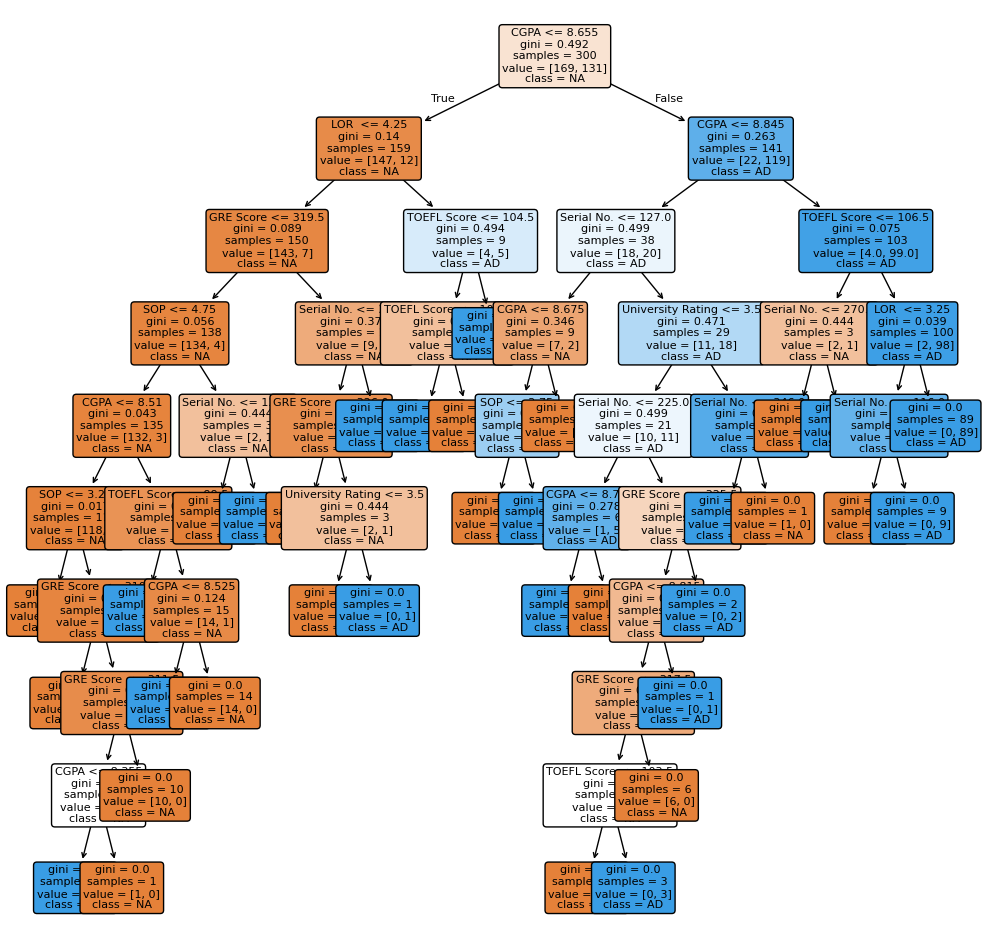

In [53]:
plt.figure(figsize=(12, 12))
plot_tree(Classifier, fontsize=8, filled=True, rounded=True,
         feature_names=x.columns, class_names=['NA', 'AD']);